# Simple Linear Regression

In [ ]:
#importing pandas
import pandas as pd

In [ ]:
#reading our csv file
df=pd.read_csv('/content/exam.csv')

In [ ]:
#dataframe
df

,id,group,sex,quanti,points,exam,passed
0,0,A,m,9,65.0,60.5,yes
1,0,A,m,9,73.5,50,yes
2,0,A,m,9,77.0,37,yes
3,0,B,m,9,80.0,41,yes
4,0,B,m,9,80.0,68,yes
...,...,...,...,...,...,...,...
108,9,B,m,9,63.5,41.5,yes
109,9,B,m,10,67.0,35,yes
110,9,B,m,10,94.0,53,yes
111,9,C,m,2,17.0,-,no


In [ ]:
df.head()

,id,group,sex,quanti,points,exam,passed
0,0,A,m,9,65.0,60.5,yes
1,0,A,m,9,73.5,50,yes
2,0,A,m,9,77.0,37,yes
3,0,B,m,9,80.0,41,yes
4,0,B,m,9,80.0,68,yes


In [ ]:
df.shape

(113, 7)

In [ ]:
#information of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      113 non-null    int64  
 1   group   113 non-null    object 
 2   sex     113 non-null    object 
 3   quanti  113 non-null    int64  
 4   points  113 non-null    float64
 5   exam    113 non-null    object 
 6   passed  113 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.3+ KB


In [ ]:
# As we can see, exam value is float, but it shows object. So, we have to convert it to float for further processing.
df['exam'] = pd.to_numeric(df['exam'], errors='coerce')
df.dtypes

id          int64
group      object
sex        object
quanti      int64
points    float64
exam      float64
passed     object
dtype: object

In [ ]:
#checking null
df.isnull()

,id,group,sex,quanti,points,exam,passed
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
108,False,False,False,False,False,False,False
109,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False
111,False,False,False,False,False,True,False


In [ ]:
#checking null sum
df.isnull().sum()


id         0
group      0
sex        0
quanti     0
points     0
exam      36
passed     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,113.0,4.592920,2.889751,0.0,2.0,5.0,7.0,9.0
quanti,113.0,8.000000,2.689264,1.0,7.0,9.0,10.0,10.0
points,113.0,58.849558,21.343375,3.0,54.0,66.0,70.5,94.0
exam,77.0,44.636364,12.678109,7.0,36.5,44.5,53.5,68.0


In [ ]:
#As we can see exam have only 77 count so we will be replace its na value with mean
df['exam'].fillna(value=mean_value,inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,113.0,4.592920,2.889751,0.0,2.0,5.000000,7.0,9.0
quanti,113.0,8.000000,2.689264,1.0,7.0,9.000000,10.0,10.0
points,113.0,58.849558,21.343375,3.0,54.0,66.000000,70.5,94.0
exam,113.0,44.636364,10.443649,7.0,41.5,44.636364,50.0,68.0


In [ ]:
#importing seaborn for visualization
import seaborn as sns


<Axes: >

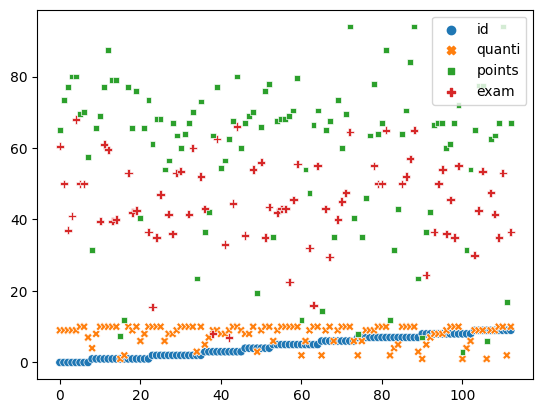

In [ ]:
#plotting scatter plot for wwhole data
sns.scatterplot(data=df)

<Axes: xlabel='points', ylabel='exam'>

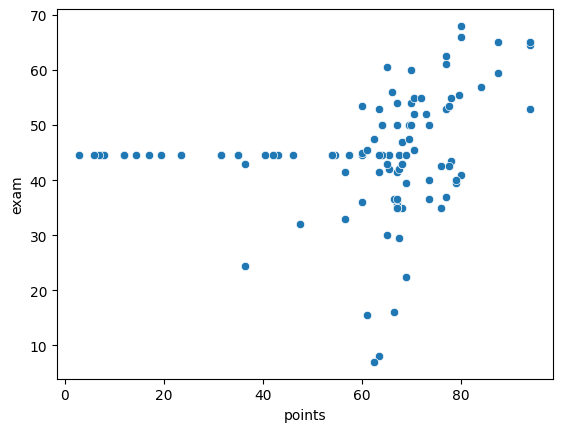

In [ ]:
sns.scatterplot(data=df,x='points',y='exam')

from the plot, It is clear that there is a linear relationship between points & exam. The notion is that students who have got good points from the excercises, they also did well in the final exam.

# Preparing data

In [ ]:
# split data into feature and target
x = pd.DataFrame(df['points'])#feature
y = pd.DataFrame(df['exam'])  #target


In [ ]:
#feature df
x

,points
0,65.0
1,73.5
2,77.0
3,80.0
4,80.0
...,...
108,63.5
109,67.0
110,94.0
111,17.0


In [ ]:
#target df
y

,exam
0,60.500000
1,50.000000
2,37.000000
3,41.000000
4,68.000000
...,...
108,41.500000
109,35.000000
110,53.000000
111,44.636364


In [ ]:
#sixe of feature and target
x.size, y.size

(113, 113)

In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 1)
(23, 1)
(90, 1)
(23, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)  # y= mx+c intercept is c

[38.45819236]


In [ ]:
print(regressor.coef_)     # y= mx+c coef is m

[[0.1030539]]


In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([[46.59945081],
       [46.59945081],
       [45.2082231 ],
       [46.393343  ],
       [46.70250471],
       [45.67196567],
       [45.98112738],
       [43.19867196],
       [45.36280396],
       [42.21965987],
       [45.15669615],
       [41.70439035],
       [44.0231032 ],
       [45.62043872],
       [45.46585786],
       [45.46585786],
       [44.64142663],
       [45.00211529],
       [44.64142663],
       [44.28073796],
       [39.69483922],
       [45.15669615],
       [46.70250471]])

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [ ]:
y_pred

,Predicted
0,46.599451
1,46.599451
2,45.208223
3,46.393343
4,46.702505
5,45.671966
6,45.981127
7,43.198672
8,45.362804
9,42.219660


In [ ]:
y_test

,exam
14,40.000000
13,39.500000
21,44.636364
2,37.000000
44,66.000000
48,54.000000
35,52.000000
76,44.636364
28,36.000000
36,43.000000


In [ ]:

df= pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
df



,Actual,Predicted
0,exam 14 40.000000 13 39.500000 2...,Predicted 0 46.599451 1 46.599451 2 ...


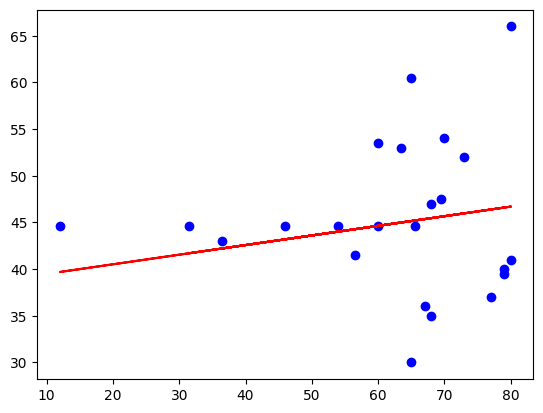

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='r')
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.3956706627398505
Mean Squared Error: 67.28160381517804
Root Mean Squared Error: 8.202536425714795


#if we want to enhance the model performance it means thier should be decrease in error values